In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

In [26]:
import flux_recoil_spec as frs
import importlib
import time
import pandas as pd
import atomic_structure as ats

In [3]:
#get the flux
Er= np.geomspace(100/1e7, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009995281867072022 0.01


In [4]:
#get the recoil spectra for neutron-nuclear
isoGe,isodictGe=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Ge')
isoSi,isodictSi=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si')
isoCaWO4,isodictCaWO4=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='CaWO4')

/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5
/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5
/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5


In [16]:
#get tritium spectra
f3_trit = pd.read_csv('../data_files/EDW/Fig3_Tritium.txt',encoding='utf-16',comment="#",header=None)
f12c_IC = pd.read_csv('../data_files/CRESST/Fig12ckgkeVd_IC.txt',encoding='utf-16',comment="#",header=None)

In [19]:
#attempt to implement analytically -- from appendix
def tritium(E):
    p0 = 1.406e-8
    p1 = 18.6
    p2 = 511
    return p0*(p1-E)**2*(p2+E)*(E**2+2*p2*E)**(1/2)

def surfbet(E):
    p0 = 1.34
    p1 = -0.058
    p2 = 0.2
    p3 = 40
    p4 = 11.4
    return p0*np.exp(p1*E)+p2*np.exp(-(E-p3)**2/(2*p4**2))

def lead(E):
    p0 = 0.037
    p1 = 0.15
    p2 = 95
    p3 = 5.7
    return p0+p1*np.exp(-(E-p2)**2/(2*p3**2))

def heat(E):
    p0 = 38.2725
    p1 = 0.293
    p2 = 1.4775
    p3 = 0.0812
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

def neutrons(E):
    p0 = 4.827e-4
    p1 = 0.3906
    p2 = 2.986e-4
    p3 = 0.05549
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

In [29]:
Er_ne= np.geomspace(0.1e-4, 100e-3, 1000)
drde_ne,dsig_ne=frs.dRdErNE(Er_ne,E,F,N=1,Z=14,A=28)
Er_ne_ge= np.geomspace(0.1e-5, 100e-3, 2000)
drde_ne_ge,dsig_ne_ge=frs.dRdErNE(Er_ne_ge,E,F,N=1,Z=32,A=70)

#K 1s L1 2s L2 2p1/2 L3 2p3/2 M1 3s M2 3p1/2 M3 3p3/2 M4 3d3/2 M5 3d5/2 N1 4s N2 4p1/2 N3 4p3/2
#32 Ge 11103 1414.6*b 1248.1*b 1217.0*b 180.1* 124.9* 120.8* 29.8 29.2

shell_energies = np.array([1.12, 99.2, 150, 1839])/1000
electron_number = np.array([4, 6, 2, 2])

drde_mod = ats.mod_and_plot(Er_ne, drde_ne, shell_energies, electron_number, plot=False)


shell_energies_Ge = np.array([29.2, 29.8, 120.8, 124.8, 180.1, 1217, 1248.1, 1414.6, 11103])/1000
electron_number_Ge = np.array([2, 2, 6, 2, 6, 10, 4, 2, 2])

drde_mod_ge = ats.mod_and_plot(Er_ne_ge, drde_ne_ge, shell_energies_Ge, electron_number_Ge, plot=False)

14
32


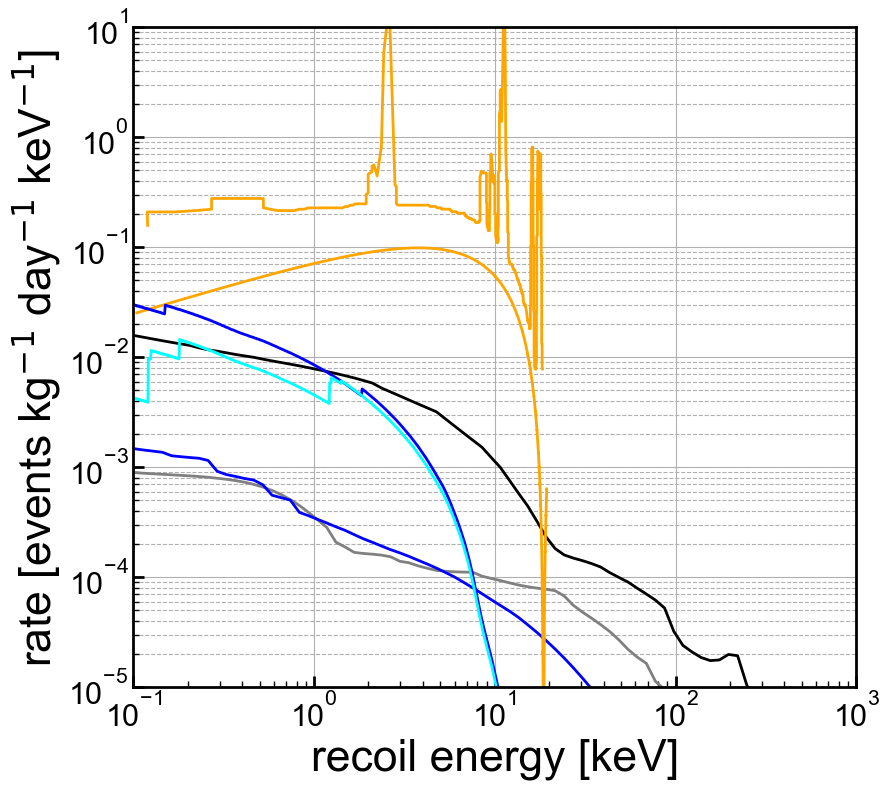

In [32]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.plot(Er*1000, 1.35e-3*isoCaWO4[:,0],color='k',label="CaWO4")
ax1.plot(Er*1000, 1.7e-4*isoSi[:,0],color='gray',label="Si")
ax1.plot(Er*1000, 1.7e-4*isoGe[:,0],color='b',label="Ge")
ax1.plot(f12c_IC[0],f12c_IC[1],label='IC',color='orange')
plt.plot(f3_trit[0],tritium(f3_trit[0]),label='EDW Tritium',color='orange')

ax1.plot(Er_ne*1000, 1.7e-4*np.asarray(drde_mod),label="neutron-electron",linestyle='-',color='b')
ax1.plot(Er_ne_ge*1000, 1.7e-4*np.asarray(drde_mod_ge),label="",linestyle='-',color='cyan')





ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/cawo4-nn-spec-compound.png')
plt.show()